In [2]:
from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
from pandas.io.gbq import read_gbq

In [4]:
import rtree

## Parks

In [5]:
cd ..

/Users/ingridspielman/Desktop/nytimes


In [6]:
parks = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/Parks Properties.geojson")

In [7]:
parks.crs
park_proj = parks.to_crs({'init': u'epsg:2263'})
park_proj.crs

{'init': u'epsg:2263'}

In [8]:
park_proj.head()

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,"(POLYGON ((998639.728754477 214672.8443260061,...",Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((1044445.201119723 246876.5331993471...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((1029700.335596384 149921.5630676614...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((1018493.260897728 246060.4564194266...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,"(POLYGON ((1001911.54078038 219553.4448010043,...",Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106


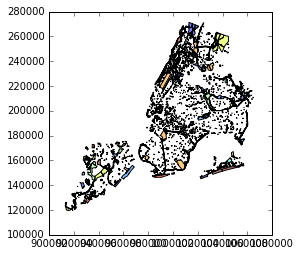

In [9]:
park_proj.plot()

## Zipcodes

In [10]:
zipcodes = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/ZIP_CODE_040114/ZIP_CODE_040114.shp")

In [11]:
zipcodes_proj = zipcodes.to_crs({'init': u'epsg:2263'})

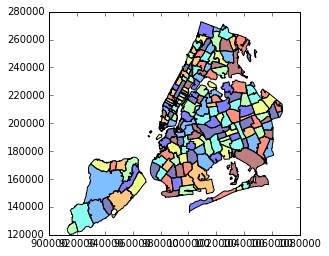

In [12]:
zipcodes.plot()

## Area overlaps of zipcodes and Parks

In [19]:
# !pip install rtree

  Using cached Rtree-0.8.3-py2-none-any.whl


In [22]:
# !pip install libspatialindex

  Could not find a version that satisfies the requirement libspatialindex (from versions: )
No matching distribution found for libspatialindex


In [13]:
# http://jspeis.com/installing-rtree-on-mac-os-x/
import rtree

In [39]:
c[['ZIPCODE', 'zipcode']]

,ZIPCODE,zipcode
28,10464,10464
31,10460,10460


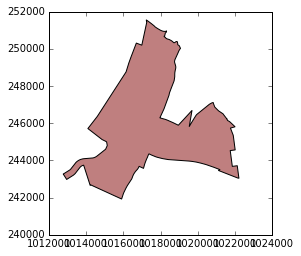

In [42]:
c[c.zipcode == '10460'].plot()

In [15]:
c = gpd.sjoin(zipcodes_proj, park_proj, how="inner", op='intersects')

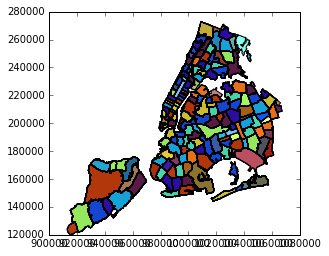

In [16]:
c.plot()

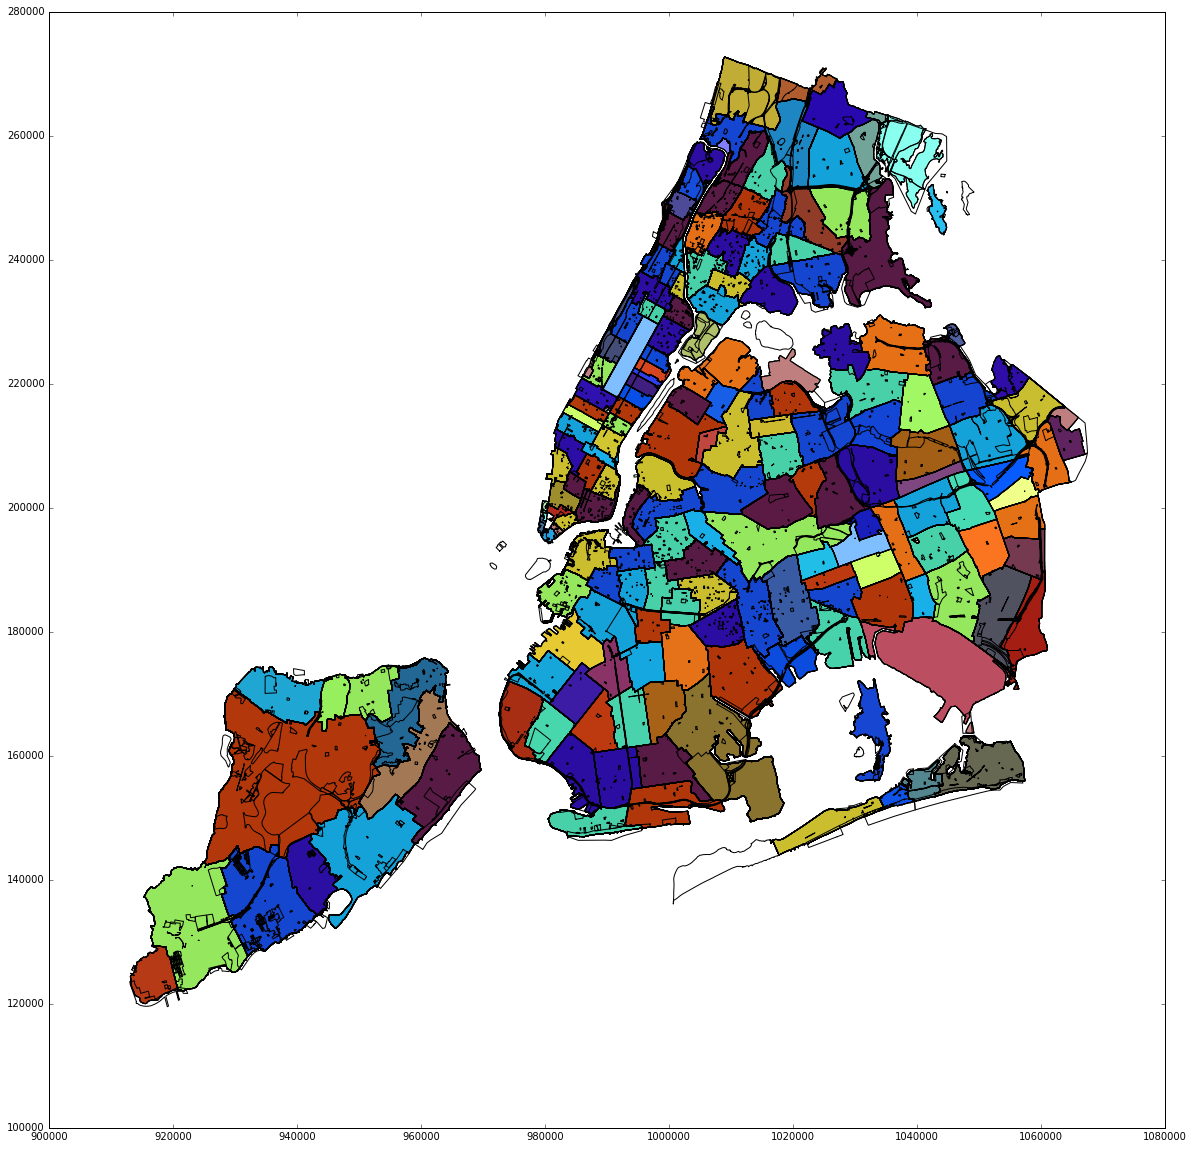

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
c.plot(ax=ax)
zipcodes_proj.plot(ax=ax, facecolor='none');
park_proj.plot(ax=ax, facecolor='none');

In [48]:
zipcodes_proj.shape

(263, 13)

In [49]:
park_proj.shape

(2008, 15)

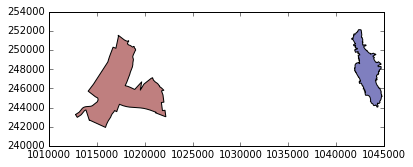

In [28]:
c.plot()

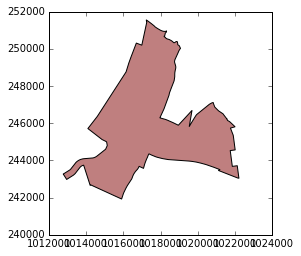

In [32]:
zipcodes_proj[zipcodes_proj.ZIPCODE == '10460'].plot()

In [ ]:
# res_intersection = gpd.overlay(zipcodes, park_proj, how='intersection')

In [58]:
res_intersection

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,...,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode,geometry
0,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464,"POLYGON ((1044163.58699038 246766.6133906163, ..."
1,3.515567e+07,0,Bronx,005,56670.0,Bronx,0.0,0.0,NY,36,...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460,"POLYGON ((1018493.260897728 246060.4564194266,..."


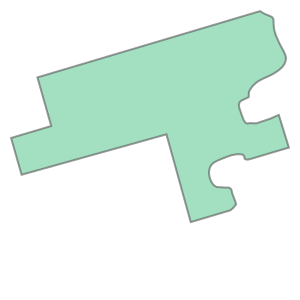

In [42]:
res_intersection.iloc[0].geometry

In [57]:
zipcodes_proj[zipcodes_proj.ZIPCODE =='10464']#.iloc[2].geometry

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry
16,7.625748e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10464,"POLYGON ((1035294.156757892 263362.0300961387,..."
27,4.512531e+06,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10464,"POLYGON ((1047319.759675147 251630.1185206389,..."
28,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,http://www.usps.com/,10464,"POLYGON ((1041692.690220641 251236.5385991323,..."


In [40]:
res_intersection.head()

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,...,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode,geometry
0,1.158795e+07,0,Bronx,005,4438.0,Bronx,0.0,0.0,NY,36,...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464,"POLYGON ((1044163.58699038 246766.6133906163, ..."
1,3.515567e+07,0,Bronx,005,56670.0,Bronx,0.0,0.0,NY,36,...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460,"POLYGON ((1018493.260897728 246060.4564194266,..."


In [32]:
gpd.__version__

u'0.2.1'

In [37]:
zipcodes_proj.columns

Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
         u'geometry'],
      dtype='object')

In [38]:
park_proj.columns

Index([     u'acres',    u'address',    u'borough', u'communityb',
       u'councildis',   u'geometry', u'gispropnum',   u'location',
       u'nys_assemb', u'nys_senate',   u'signname', u'typecatego',
       u'us_congres', u'waterfront',    u'zipcode'],
      dtype='object')

In [35]:
res_intersection.columns

Index([      u'AREA',    u'BLDGZIP',     u'COUNTY',   u'CTY_FIPS',
       u'POPULATION',    u'PO_NAME', u'SHAPE_AREA',  u'SHAPE_LEN',
            u'STATE',    u'ST_FIPS',        u'URL',    u'ZIPCODE',
            u'acres',    u'address',    u'borough', u'communityb',
       u'councildis', u'gispropnum',   u'location', u'nys_assemb',
       u'nys_senate',   u'signname', u'typecatego', u'us_congres',
       u'waterfront',    u'zipcode',   u'geometry'],
      dtype='object')

## Zillow Data

In [6]:
zipcodes_nyc = [
    '10001',    '10002',
    '10003',    '10004',    '10005',
    '10006',    '10007',    '10009',    '10010', '10011',
    '10012',
    '10013',
    '10014',  '10016',
    '10017',
    '10018',
    '10019',
    '10020',
    '10021',
    '10022',
    '10023',
    '10024',
    '10025',
    '10026',   '10027',
    '10028',    '10029',
    '10030',    '10031',
    '10032',    '10033',
    '10034',    '10035',
    '10036',    '10037',
    '10038',    '10039',
    '10040',
    '10044',
    '10048',
    '10065',
    '10069',
    '10075',
    '10111',
    '10115',
    '10128',
    '10280',
    '10281',
    '10282',
    '10301',
    '10302',
    '10303',
    '10304',
    '10305',
    '10306',
    '10307',
    '10308',
    '10309',
    '10310',
    '10312',
    '10314',
    '10451',
    '10452',
    '10453',
    '10454',
    '10455',
    '10456',
    '10457',
    '10458',
    '10459',
    '10460',
    '10461',
    '10462',
    '10465',
    '10466',
    '10467',
    '10468',
    '10469',
    '10470',
    '10471',
    '10472',
    '10473',
    '10474',
    '10475',
    '11001',
    '11004',
    '11005',
    '11040',
    '11096',
    '11101',
    '11102',
    '11103',
    '11104',
    '11105',
    '11106',
    '11109',
    '11201',
    '11203',
    '11204',
    '11205',
    '11206',
    '11207',
    '11208',
    '11209',
    '11210',
    '11211',
    '11212',
    '11213',
    '11214',
    '11215',
    '11216',
    '11217',
    '11218',
    '11219',
    '11220',
    '11221',
    '11222',
    '11223',
    '11224',
    '11225',
    '11226',
    '11228',
    '11229',
    '11230',
    '11231',
    '11232',
    '11233',
    '11234',
    '11235',
    '11236',
    '11237',
    '11238',
    '11239',
    '11251',
    '11354',
    '11355',
    '11356',
    '11357',
    '11358',
    '11359',
    '11360',
    '11361',
    '11362',
    '11363',
    '11364',
    '11365',
    '11366',
    '11367',
    '11368',
    '11369',
    '11371',
    '11372',
    '11373',
    '11374',
    '11375',
    '11377',
    '11378',
    '11379',
    '11385',
    '11411',
    '11412',
    '11413',
    '11414',
    '11415',
    '11416',
    '11417',
    '11418',
    '11419',
    '11420',
    '11421',
    '11422',
    '11423',
    '11426',
    '11427',
    '11428',
    '11429',
    '11430',
    '11432',
    '11433',
    '11434',
    '11435',
    '11436',
    '11451',
    '11691',
    '11692',
    '11694',
    '11697',
]
zipcodes_nyc = [int(x) for x in zipcodes_nyc]

In [7]:
from pandas.io.gbq import read_gbq  
project = "spheric-crow-161317" 
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_studio`"  
studio_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
studio_zip['kind'] = 'studio'

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 87 rows.

Total time taken 0.95 s.
Finished at 2017-03-25 13:32:16.


In [11]:
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_1br`"  
br1_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
br1_zip['kind'] = 'br1'

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 424 rows.

Total time taken 1.47 s.
Finished at 2017-03-25 13:32:40.


In [12]:
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_2br`"  
br2_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')
br2_zip['kind'] = 'br2'
br2_zip.shape

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 619 rows.

Total time taken 1.64 s.
Finished at 2017-03-25 13:32:44.


(619, 91)

In [13]:
br2_zip = br2_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [14]:
br1_zip = br1_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [15]:
studio_zip = studio_zip[[u'RegionName', u'City', u'State', u'Metro', u'CountyName', u'SizeRank',
         u'_2016_01', u'_2016_02', u'_2016_03', u'_2016_04',
       u'_2016_05', u'_2016_06', u'_2016_07', u'_2016_08', u'_2016_09',
       u'_2016_10', u'_2016_11', u'_2016_12', u'_2017_01', u'kind']]

In [16]:
apt_types = pd.concat([br2_zip, br1_zip, studio_zip])

In [17]:
nyc_apts = apt_types[apt_types.RegionName.isin(zipcodes_nyc)]

In [18]:
nyc_apts.kind.value_counts()

br1       102
br2        95
studio     49
Name: kind, dtype: int64

In [41]:
nyc_apts.to_csv('merged_data.csv')